In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics 

In [2]:
# read the data
data = pd.read_csv("mall.csv")
data 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
print(f'{data.shape[0]} samples and {data.shape[1]} features in the insurance  dataset.')

200 samples and 5 features in the insurance  dataset.


In [4]:
# renaming column name
data.rename(columns = {'Genre':'gender','Annual Income (k$)':'annual_income','Spending Score (1-100)':'spending_score','Age':'age'}, inplace = True)
data

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Understanding the data

In [5]:
#view data types
data.dtypes

CustomerID         int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [6]:
#view statistical information.
data.describe([0.99])

,CustomerID,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
50%,100.500000,36.000000,61.500000,50.000000
99%,198.010000,69.010000,126.110000,97.010000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.columns

Index(['CustomerID', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

### Data mining 

In [9]:
#missing data
data.isnull().sum()

CustomerID        0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [10]:
#checking for duplicate values
data[data.duplicated()]

,CustomerID,gender,age,annual_income,spending_score


In [11]:
# checking Unique count
data.nunique()

CustomerID        200
gender              2
age                51
annual_income      64
spending_score     84
dtype: int64

In [12]:
# dropping column
data = data.drop('CustomerID',axis=1)
data

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# EDA

- NUMBER OF CUSTOMERS 
- MALE AND FEMALE COMPARISION
- GENDER INFLUENCE SPENDING
- AGE OF CUSTOMERS
- AGE VS SPENDING OF CUSTOMERS
- DISTRIBUTION OD ANNUAL INCOME AND RELATION WITH SPENDING
- DISTRIBUTION OF SPENDING SCORE


In [13]:
# NUMBER OF CUSTOMERS
print('There are {} customers.'.format(len(data)))

There are 200 customers.


In [14]:
# MALE AND FEMALE COMPARISION
data.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

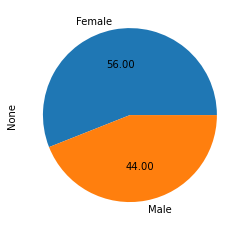

In [15]:
data.groupby('gender').size().plot(kind='pie', autopct='%.2f')
plt.show()

- Both the count and pie chart shows that there are more females than male customers.

In [16]:
# GENDER INFLUENCE SPENDING
pd.pivot_table(data,index=['gender'],values=['spending_score'])

,spending_score
gender,
Female,51.526786
Male,48.511364


- from this table we can conclude that females spend slightly more than males

In [17]:
female_score = data.spending_score[data.gender=='Male']
male_score = data.spending_score[data.gender=='Female']

from scipy.stats import ttest_ind
tstat, pval = ttest_ind(female_score,male_score)

print(pval/2)

0.2068723294926088


- The p value is highier than 0.05 so we accept the null hypothesis and conclude that the spending score of females is not really different from that of males. This slight difference is out of chance.

In [18]:
# AGE OF CUSTOMERS

print('Mean is {0} and Median is {1}'.format(data.age.mean(),data.age.median()))

Mean is 38.85 and Median is 36.0


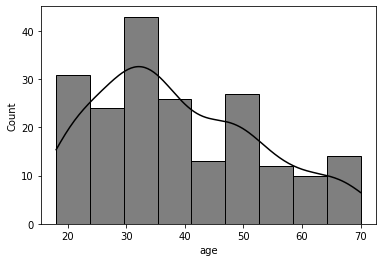

In [19]:
sns.histplot(data.age, kde = True, color = 'black')
plt.show()

- from above histogram plot we can see that most  of the customers are within age of 25 to 40 years with an average age of 38.85 i.e 39 and median age of 36 years

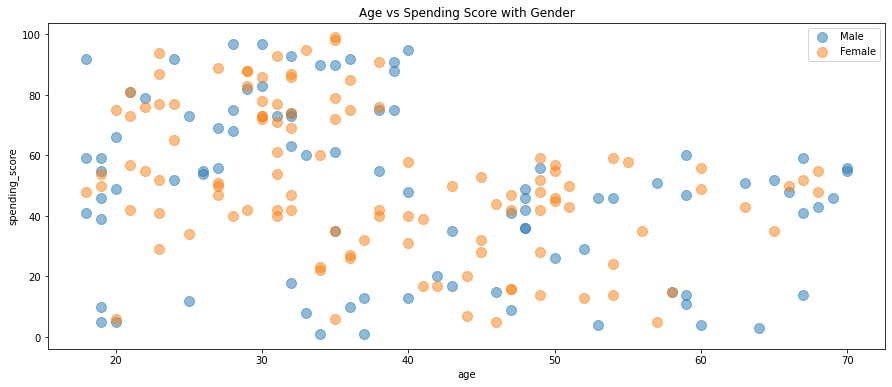

In [20]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'spending_score' , data = data[data['gender'] == gender] ,
                s = 100 , alpha = 0.5 , label = gender)
plt.xlabel('age')
plt.ylabel('spending_score') 
plt.title('Age vs Spending Score with Gender')
plt.legend()
plt.show()

- from the above scatterplot it shows that the younger people tend to spend more.

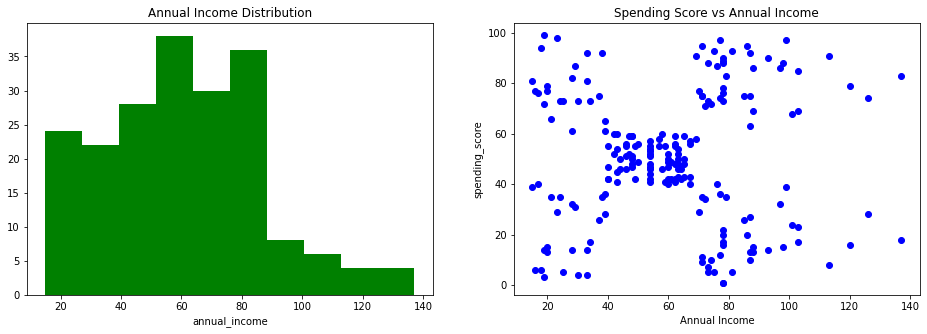

In [21]:
# DISTRIBUTION OD ANNUAL INCOME AND RELATION WITH SPENDING

fig,ax = plt.subplots(1,2, figsize=(16,5))

ax[0].hist(data.annual_income, color="green")
ax[0].set(title='Annual Income Distribution',xlabel='annual_income')
ax[1].scatter(data.annual_income, data.spending_score,color='blue')

ax[1].set(xlabel='Annual Income', ylabel='spending_score', title= 'Spending Score vs Annual Income')
plt.show()

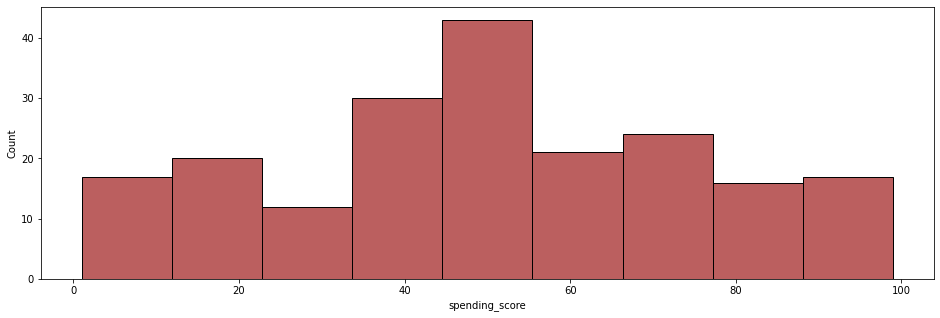

In [22]:
# DISTRIBUTION OF SPENDING SCORE

plt.figure(figsize=(16,5))
sns.histplot(data.spending_score,color = 'brown')
plt.show()

# FEATURE SELECTION

- From the exploratory data analysis above, it is obvious that all the variables have some sort of relationship with spending score. We will be using all the variables to build the clustering models.

# FEATURE TRANSFORMATION

- Since the Gender column datatype is categorical, then we have to convert it into a numerical datatype using one hot encoding (pandas.get_dummies).

In [23]:
# DUMMIES

data = pd.get_dummies(data,drop_first=True)
data.head()

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


Choosing the Annual Income Column and Spending Score column

In [24]:
data

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [25]:
x = data.iloc[:,[1,2]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS >> Within Clusters Sum square

In [26]:
# finding wcss value for different number of clusters 

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

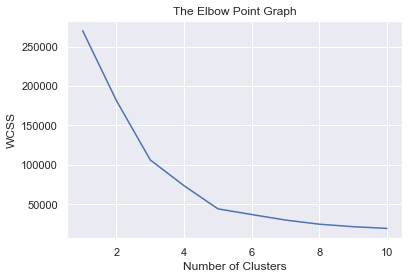

In [27]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum numbers of clusters = 5

# KMeans Clustering

In [28]:
# Traning the K-Means Clustering Model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# return the label for data point based on their cluster
y = kmeans.fit_predict(x)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Visualizing all the Clusters

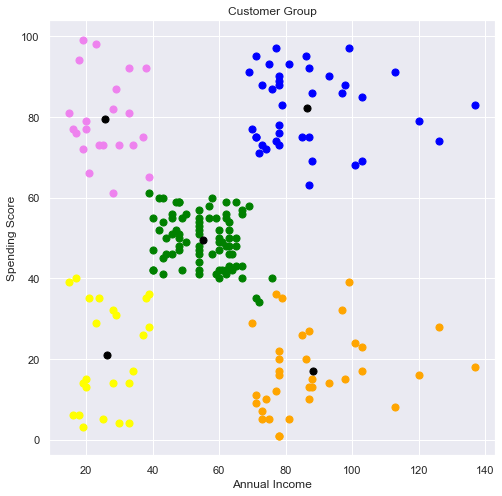

In [29]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3') 
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, color='black')
plt.title('Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Fit the data and get the labels

In [30]:
kmeans.fit(data)
k_labels = kmeans.labels_

# DBSCAN Clustering Model

In [31]:
dbscan = DBSCAN(eps=12,min_samples=7.5)

# Fit the model
cluster = dbscan.fit(data)
db_labels = cluster.labels_

Lets calculate the number of clusters found by the algorithm

In [32]:
no_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print('There are {} clusters'.format(no_clusters))

There are 4 clusters


How to find the best values for epsulun and min_samples?

You will have to experiment with different values, but i often use 'for loop' to find min_samples as shown in the code below

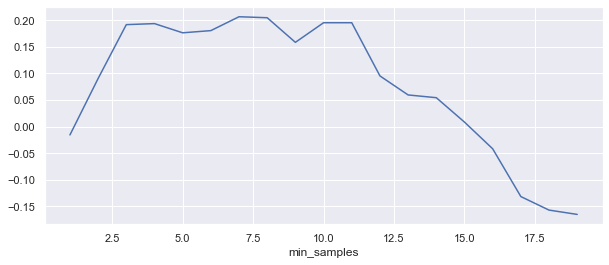

In [33]:
sh_score = []
for num in range (1,20):
    dbscan = DBSCAN(eps=12,min_samples=num)
    model = dbscan.fit(data)
    d_labels = model.labels_
    score = metrics.silhouette_score(data,d_labels)
    sh_score.append(score)
plt.figure(figsize=(10,4))
plt.plot(list(range(1,20)),sh_score)
plt.xlabel('min_samples')
plt.show()


How does the clusters relate with our variables?


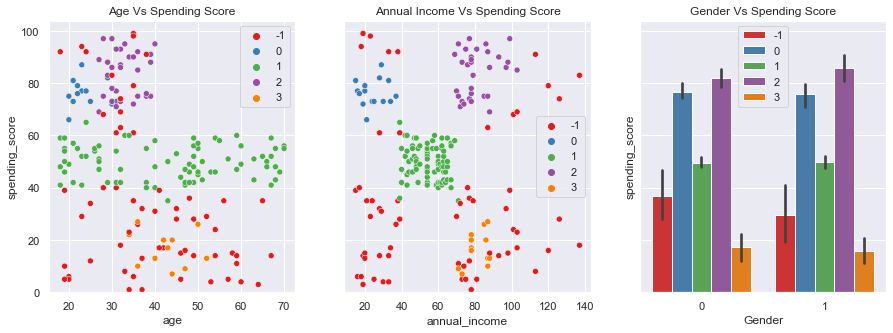

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax = axes[0],x = data.age, y = data.spending_score, hue = db_labels, palette = 'Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax = axes[1], x = data.annual_income, y = data.spending_score, hue = db_labels, palette = 'Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax = axes[2], x = data.gender_Male, y = data.spending_score, hue = db_labels, palette = 'Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel("Gender")

plt.show()

Similarly,DBSCAN also shows that Age is the most important factor to consider as younger people spend more irrespective of their Annual income.


In [35]:
# Models Performance And Evaluation Using Silhouette Coefficient

# For KMeans

coef = metrics.silhouette_score(data,k_labels)
print('The silhouette score is {}'.format(coef))

The silhouette score is 0.44424291275274114


In [36]:
# For DBSCAN

coef = metrics.silhouette_score(data, db_labels)
print('The silhouette score is {}'.format(coef))

The silhouette score is 0.20473300000169162


KMeans Clustering performs better than DBSCAN Clustering.